In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\hp\Downloads\crop_yield1.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649472
std,259.851320,7.220608,25.953412,1.696572
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


In [3]:
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [4]:
print(df.isnull().sum())
print(df.dtypes)


Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64
Region                     object
Soil_Type                  object
Crop                       object
Rainfall_mm               float64
Temperature_Celsius       float64
Fertilizer_Used              bool
Irrigation_Used              bool
Weather_Condition          object
Days_to_Harvest             int64
Yield_tons_per_hectare    float64
dtype: object


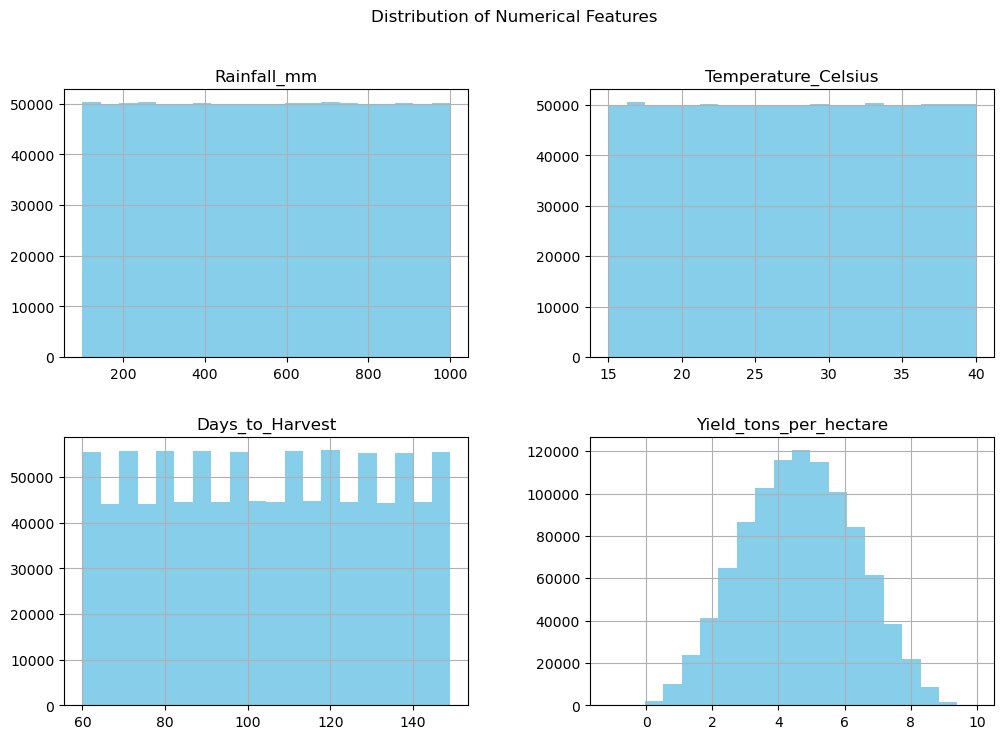

In [5]:
# Plot histograms for all key numerical features to understand their distributions.
# This helps identify skewness, outliers, and overall data spread before modeling
num_cols = ["Rainfall_mm", "Temperature_Celsius", "Days_to_Harvest", "Fertilizer_Used",	"Irrigation_Used", "Yield_tons_per_hectare"]
df[num_cols].hist(figsize=(12, 8), bins=20, color='skyblue')
plt.suptitle("Distribution of Numerical Features")
plt.show()


Markdown Cell (to place above or below the code)
Exploratory Data Analysis: Distribution of Numerical Features
The histograms below show the distribution of the main numerical variables in the dataset:

-Rainfall (mm)

-Temperature (°C)

-Fertilizer Used (kg/ha)

-Days to Harvest

-Yield (tons/ha)

By visualizing these distributions, we can:

-Detect skewness (e.g., fertilizer use may be right‑skewed).

-Spot outliers (extreme rainfall or yield values).

-Understand the spread and central tendency of each feature.

This step is crucial before applying machine learning models, as it informs preprocessing choices such as scaling, transformations, or handling outliers.

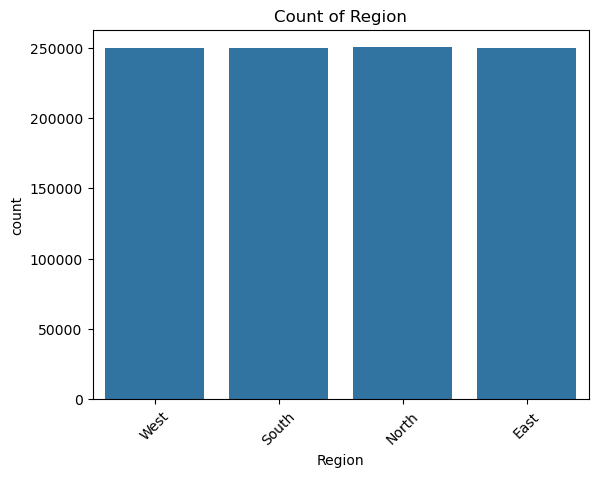

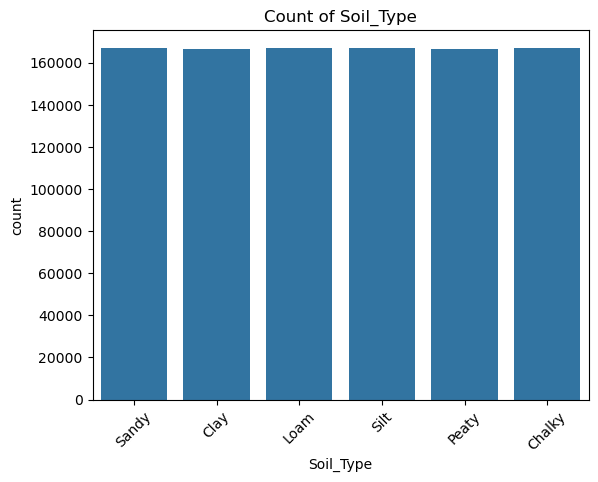

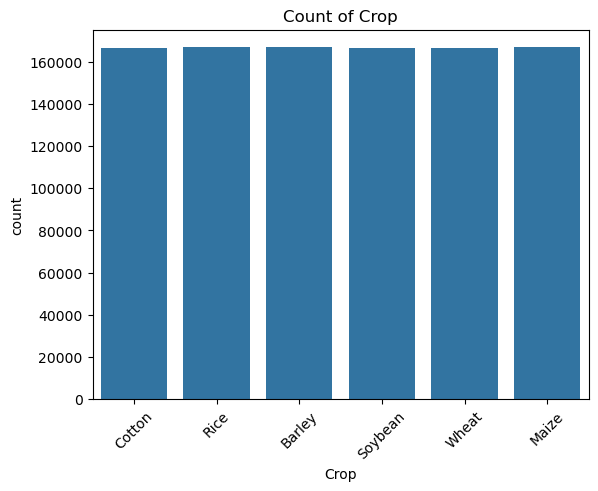

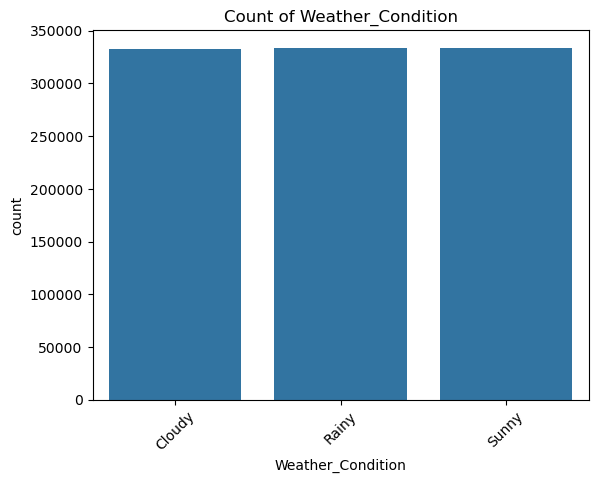

In [6]:
# Plot count distributions for all categorical features.
# This helps us understand the frequency of each category (e.g., which crops are most common,
# which soil types dominate, or how irrigation and weather conditions are distributed).cat_cols = ['Region', 'Soil_Type', 'Crop', 'Irrigation_Used', 'Weather_Condition']
cat_cols=["Region","Soil_Type","Crop","Weather_Condition"]	
for col in cat_cols:
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f"Count of {col}")
    plt.show()


The bar charts below display the frequency distribution of the categorical variables:

Region → shows which regions dominate the dataset.

•Soil Type → highlights the prevalence of different soil categories.

•Crop → reveals which crops are most represented.

•Irrigation Used → indicates whether irrigation is commonly applied.

•Weather Condition → shows the distribution of weather patterns in the data.

By visualizing these categorical features, we can:

Detect imbalances (e.g., if one crop or region is overrepresented).

Understand contextual patterns (e.g., irrigation mostly used in certain regions).

Prepare for encoding strategies (e.g., one‑hot encoding) before modeling.

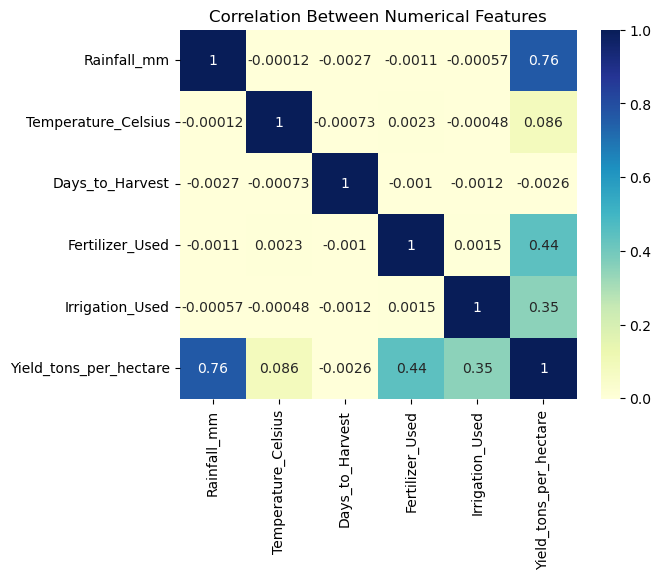

In [7]:
# Compute the correlation matrix for numerical features
corr = df[num_cols].corr()

# Plot a heatmap to visualize correlations
# annot=True → display correlation values inside the cells
# cmap='YlGnBu' → use a yellow-green-blue color palette for clarity
sns.heatmap(corr, annot=True, cmap='YlGnBu')

# Add a title for context
plt.title("Correlation Between Numerical Features")
plt.show()


Correlation Analysis of Numerical Features
The heatmap below shows the pairwise correlations between the numerical variables in our dataset:

•Positive correlation (closer to +1) → as one feature increases, the other tends to increase (e.g., fertilizer use and yield).

•Negative correlation (closer to -1) → as one feature increases, the other tends to decrease (e.g., days to harvest vs. temperature, if present).

•Near 0 → little to no linear relationship.

This analysis helps us:

•Identify strong predictors of yield.

•Detect multicollinearity (when two features are highly correlated, which can affect some models like Linear Regression).

•Guide feature selection and preprocessing decisions

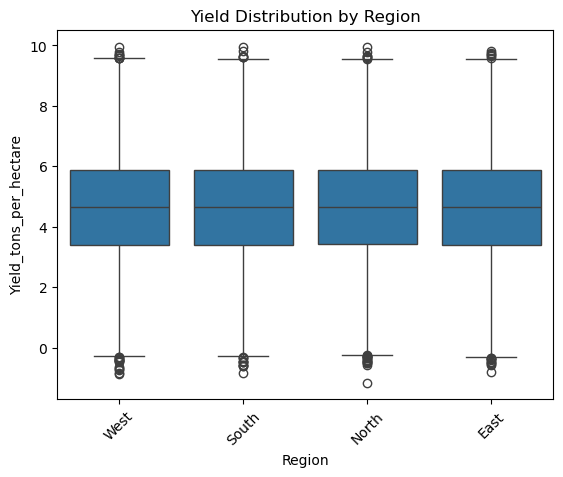

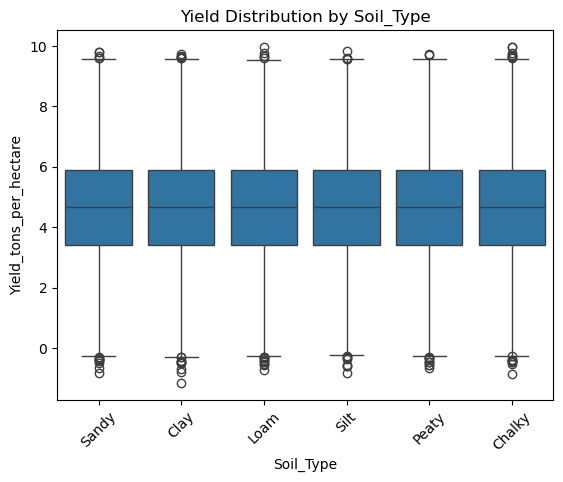

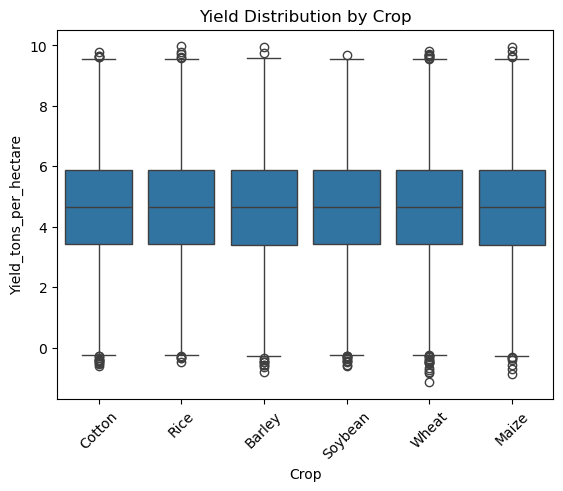

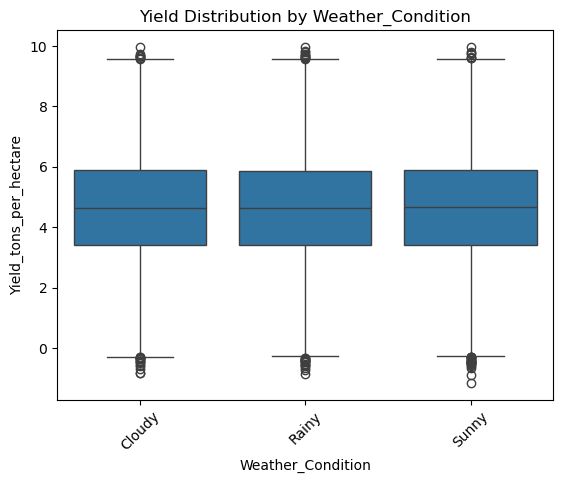

In [8]:
# Boxplots of yield distribution across each categorical feature
# This helps us compare how yield varies by categories such as Region, Soil Type, Crop, etc.
# Boxplots show median, quartiles, and potential outliers for each group.

for col in cat_cols:
    sns.boxplot(data=df, x=col, y='Yield_tons_per_hectare')
    plt.xticks(rotation=45)                 # rotate labels for readability
    plt.title(f"Yield Distribution by {col}")
    plt.show()


Yield Distribution by Categorical Features
The boxplots below illustrate how crop yield (tons/ha) varies across different categorical variables:

•Region → highlights regional differences in productivity.

•Soil Type → shows which soils are more favorable for higher yields.

•Crop → compares yield levels across different crop types.

•Irrigation Used → reveals the impact of irrigation on yield distribution.

•Weather Condition → shows how weather patterns affect yield outcomes.

Why this matters:

•Boxplots allow us to see median yield, spread of values, and outliers for each category.

•They help identify which categories are associated with higher or more stable yields.

•This guides both feature importance interpretation and practical recommendations (e.g., “irrigated fields consistently yield more”).

In [9]:
# Calculate the Interquartile Range (IQR) for yield
Q1 = df['Yield_tons_per_hectare'].quantile(0.25)   # 25th percentile
Q3 = df['Yield_tons_per_hectare'].quantile(0.75)   # 75th percentile
IQR = Q3 - Q1                                      # Interquartile range

# Filter out outliers using the IQR rule
# Keep only rows where yield lies within [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
df = df[(df['Yield_tons_per_hectare'] >= Q1 - 1.5 * IQR) & 
        (df['Yield_tons_per_hectare'] <= Q3 + 1.5 * IQR)]



•Outlier Detection and Removal (IQR Method)
To ensure our analysis is not skewed by extreme values, we applied the Interquartile Range (IQR) method to detect and remove outliers in crop yield:

•Q1 (25th percentile) → the lower quartile of yield values.

•Q3 (75th percentile) → the upper quartile of yield values.

•IQR = Q3 – Q1 → the middle 50% spread of the data.

•Rule: Any value outside the range 
[𝑄1−1.5×𝐼𝑄𝑅,  𝑄3+1.5×𝐼𝑄𝑅] is considered an outlier.

Why this matters:

•Outliers can distort model training and evaluation.

•By removing them, we ensure the model learns from the true underlying patterns rather than noise.

•This step improves both accuracy and generalization of predictions.

In [10]:
from scipy.stats import zscore

# Compute the Z-score for the target variable (yield)
# Z-score measures how many standard deviations a value is from the mean
df['z_score'] = zscore(df['Yield_tons_per_hectare'])

# Filter out rows where the absolute Z-score is >= 3
# (commonly used threshold: values beyond ±3 std dev are considered outliers)
df = df[df['z_score'].abs() < 3]


Outlier Detection and Removal (Z‑Score Method)
We applied the Z‑score method to detect and remove outliers in crop yield:

•Z‑score formula:

 𝑍=𝑋−𝜇𝜎, 
 where 𝑋 = data point, 𝜇 = mean, 𝜎 = standard deviation.

•Interpretation:

 A Z‑score of 0 → value is exactly at the mean.

 Positive Z‑score → above the mean.

 Negative Z‑score → below the mean.

 Values with ∣𝑍∣ ≥ 3 are considered outliers (too far from the average).

Why this matters:

•Removes extreme yield values that could distort model training.

•Works best when the data is approximately normally distributed.

•Ensures the model learns from the core distribution rather than rare anomalies.

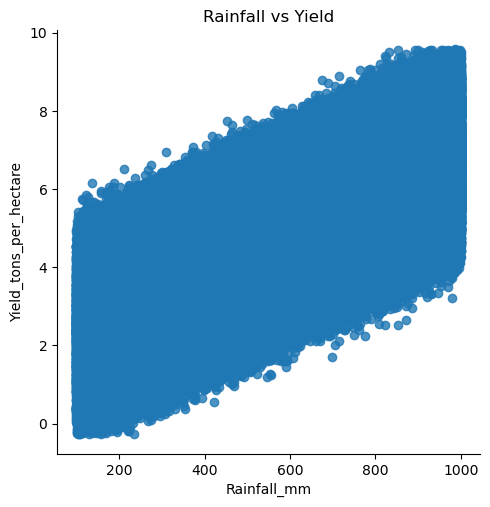

In [11]:
# Scatter plot with regression line between Rainfall and Yield
# sns.lmplot automatically fits a linear regression line to the scatter
# This helps us visualize whether rainfall has a linear relationship with yield

sns.lmplot(x='Rainfall_mm', y='Yield_tons_per_hectare', data=df)
plt.title("Rainfall vs Yield")
plt.show()



Rainfall vs Yield Relationship
The plot below shows the relationship between rainfall (mm) and crop yield (tons/ha):

•Each point represents a data observation (rainfall vs yield).

•The blue regression line indicates the trend between rainfall and yield.

•If the line slopes upward → higher rainfall is generally associated with higher yields.

•If the line is flat or downward → rainfall has little or negative impact on yield.

Why this matters:

•Helps us visually confirm whether rainfall is a strong predictor of yield.

•Identifies potential non‑linear patterns (e.g., too much rainfall may reduce yield).

•Supports feature importance analysis by showing the direct relationship.

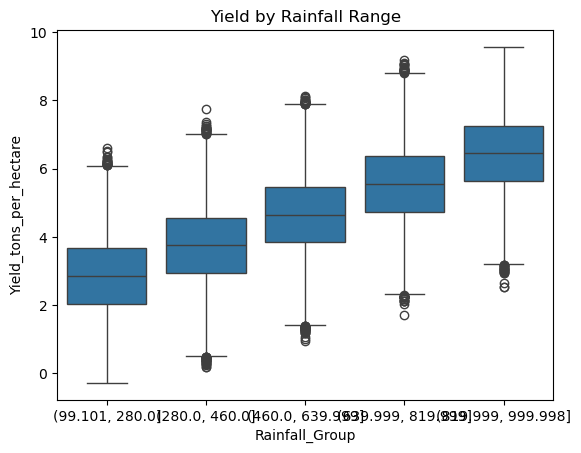

In [12]:
# Group rainfall values into 5 equal-width bins (intervals)
df['Rainfall_Group'] = pd.cut(df['Rainfall_mm'], bins=5)

# Create a boxplot to compare yield distribution across rainfall ranges
sns.boxplot(x='Rainfall_Group', y='Yield_tons_per_hectare', data=df)

# Add a title for clarity
plt.title("Yield by Rainfall Range")
plt.show()


•Yield Distribution by Rainfall Range
This boxplot shows how crop yield (tons/ha) varies across different rainfall ranges:

•Rainfall has been divided into 5 equal intervals (low → high).

•Each boxplot displays the median yield, interquartile range (IQR), and outliers for that rainfall group.

•This allows us to see whether higher rainfall consistently leads to higher yields, or if there is an optimal range beyond which yield does not improve (or may even decline).

Why this matters:

•Helps identify the rainfall thresholds most favorable for crop productivity.

•Provides evidence for crop planning (e.g., rice thrives in higher rainfall groups, while barley may perform better in lower ranges).

•Supports feature importance interpretation by showing the direct effect of rainfall on yield

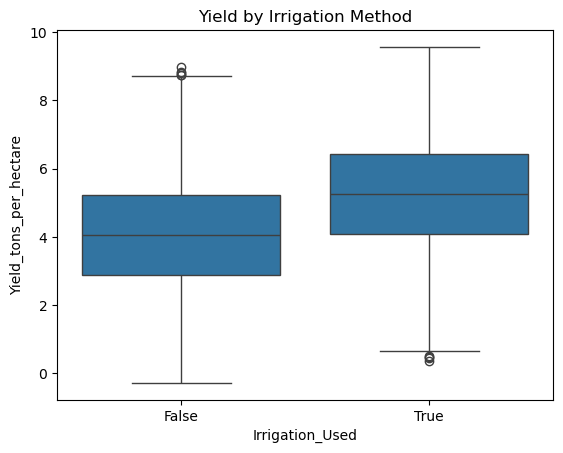

C:\Users\hp\anaconda3\envs\cro_recommendationproject\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


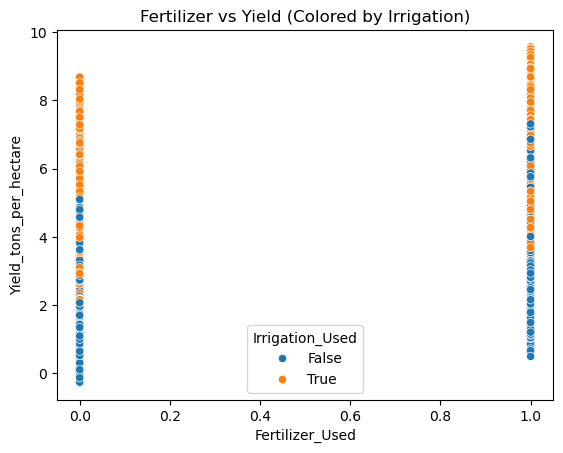

In [13]:
# Boxplot: Compare yield distribution across different irrigation methods
sns.boxplot(x='Irrigation_Used', y='Yield_tons_per_hectare', data=df)
plt.title("Yield by Irrigation Method")
plt.show()

# Scatterplot: Relationship between fertilizer use and yield
# Colored by irrigation method to see interaction effects
sns.scatterplot(x='Fertilizer_Used', y='Yield_tons_per_hectare', hue='Irrigation_Used', data=df)
plt.title("Fertilizer vs Yield (Colored by Irrigation)")
plt.show()


Irrigation and Fertilizer Effects on Yield

•Boxplot (Yield by Irrigation Method): This plot compares the distribution of crop yields across different irrigation methods.

 The median line shows the typical yield for each method.

 The spread of the box shows variability.

 Outliers (if any) indicate unusual yield values.

 Interpretation: If irrigated fields show consistently higher medians, irrigation is a strong positive factor for yield.

•Scatterplot (Fertilizer vs Yield, colored by Irrigation): This plot shows how fertilizer use relates to yield, with points colored by irrigation method.

 A positive slope suggests that more fertilizer generally increases yield.

 Coloring by irrigation reveals interaction effects: for example, fertilizer may boost yield more effectively when irrigation is used.

 This helps us see not just individual effects, but how fertilizer and irrigation work together.

Why this matters:

•These visualizations highlight the practical impact of resource use.

•They provide evidence for recommendations like:

  “Irrigation consistently improves yield.”

  “Fertilizer is more effective when combined with irrigation.”

In [15]:
import statsmodels.formula.api as smf

# Build an Ordinary Least Squares (OLS) regression model
# Formula: Yield ~ Fertilizer + Irrigation + Fertilizer*Irrigation
# The '*' operator expands to include both main effects and their interaction
# This allows us to test not only the individual effects of Fertilizer and Irrigation,
# but also whether their combination has an additional impact on yield.

model = smf.ols('Yield_tons_per_hectare ~ Fertilizer_Used * Irrigation_Used', data=df).fit()

# Print the full regression summary (coefficients, R², p-values, etc.)
print(model.summary())



                              OLS Regression Results                              
Dep. Variable:     Yield_tons_per_hectare   R-squared:                       0.320
Model:                                OLS   Adj. R-squared:                  0.320
Method:                     Least Squares   F-statistic:                 1.569e+05
Date:                    Tue, 28 Oct 2025   Prob (F-statistic):               0.00
Time:                            11:54:08   Log-Likelihood:            -1.7542e+06
No. Observations:                  999916   AIC:                         3.508e+06
Df Residuals:                      999912   BIC:                         3.509e+06
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

•Regression with Interaction Effects (Fertilizer × Irrigation)
We used an Ordinary Least Squares (OLS) regression model to analyze how fertilizer and irrigation affect crop yield:

•Formula:
Yield∼Fertilizer + Irrigation + (Fertilizer*Irrigation)

•Interpretation of terms:

 Fertilizer_Used → effect of fertilizer when irrigation = 0.

 Irrigation_Used → effect of irrigation when fertilizer = 0.

 Interaction (Fertilizer × Irrigation) → shows whether the combined effect of fertilizer and irrigation is   greater (synergistic) or less (diminishing returns) than the sum of their individual effects.

•Output (from model.summary()):

 Coefficients → size and direction of each effect.

 p-values → whether the effect is statistically significant.

 R² → how much of the variation in yield is explained by the model.

Why this matters:

•If the interaction term is significant, it means fertilizer and irrigation amplify each other’s effects.

•This provides stronger, evidence‑based recommendations: e.g., “Fertilizer is most effective when irrigation is also applied.”

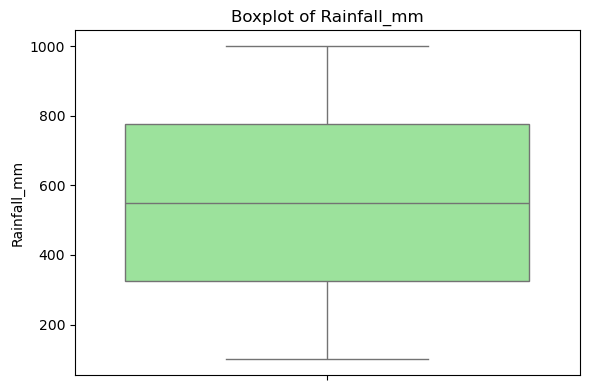

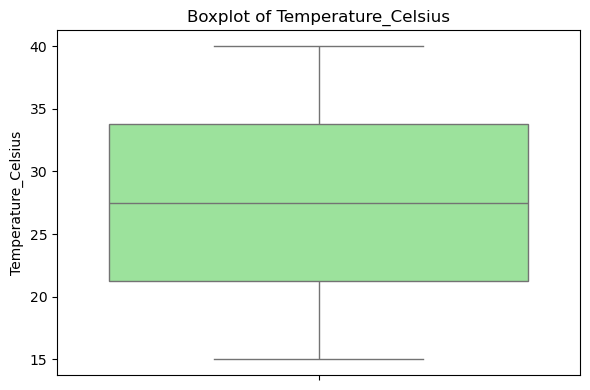

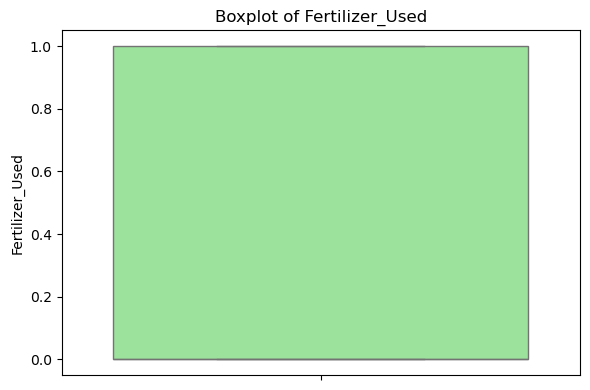

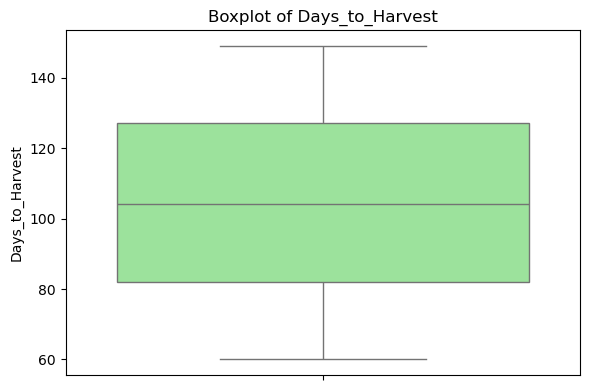

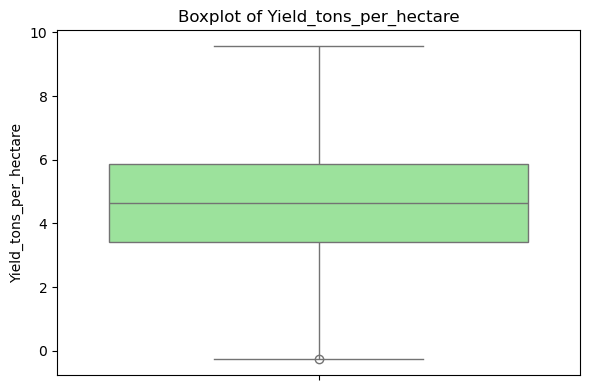

In [16]:

# Define the numerical columns to analyze
num_cols = ['Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used', 
            'Days_to_Harvest', 'Yield_tons_per_hectare']

# Generate boxplots for each numerical feature
# Boxplots help detect outliers, visualize medians, and understand data spread
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, y=col, color='lightgreen')
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()



Boxplots of Numerical Features
The boxplots below display the distribution of the main numerical variables in the dataset:

•Rainfall (mm)

•Temperature (°C)

•Fertilizer Used (kg/ha)

•Days to Harvest

•Yield (tons/ha)

What boxplots show us:

•The median (central line inside the box).

•The interquartile range (IQR) (the box itself, covering the middle 50% of values).

•Whiskers (showing the spread of most data points).

•Outliers (points outside whiskers, potential anomalies).

Why this matters:

•Helps identify skewed distributions and extreme values.

•Guides preprocessing decisions like outlier removal or feature transformation.

•Provides an early sense of which features may strongly influence yield.

In [17]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = ['Region', 'Soil_Type', 'Crop', 'Irrigation_Used', 'Weather_Condition']

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


One‑Hot Encoding of Categorical Features
Machine learning models require numerical inputs, so categorical variables (like region, soil type, crop, irrigation, and weather condition) must be converted into numeric form.

We used One‑Hot Encoding to achieve this:

Each category becomes a new binary (0/1) column.

Example: Soil_Type → Soil_Type_Sandy, Soil_Type_Clay, Soil_Type_Loam.

If a row belongs to “Sandy” soil, then Soil_Type_Sandy = 1, others = 0.

drop_first=True ensures we avoid multicollinearity by dropping one reference category per feature.

Why this matters:

Preserves categorical information in a format models can use.

Prevents the model from misinterpreting categories as ordered values.

Ensures fair comparison between categories without introducing redundancy.

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

num_cols = ['Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used', 'Days_to_Harvest']

# Standardization
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# OR Min-Max scaling
# scaler = MinMaxScaler()
# df[num_cols] = scaler.fit_transform(df_encoded[num_cols])


Feature Scaling of Numerical Variables
Machine learning models often perform better when numerical features are on a comparable scale. We applied two common scaling techniques:

Standardization (Z‑score scaling):

Formula: 
(𝑋−𝜇)/𝜎

Centers data around 0 mean with unit variance.

Useful for algorithms that assume normally distributed data (e.g., Linear Regression, Logistic Regression, PCA).

Min‑Max Scaling (Normalization):

Formula: 
(𝑋−𝑋𝑚𝑖𝑛)/(𝑋𝑚𝑎𝑥−𝑋𝑚𝑖𝑛)

Rescales features to a fixed range [0, 1].

Useful for algorithms sensitive to absolute magnitudes (e.g., Neural Networks, KNN).

Why this matters:

Prevents features with large ranges (like rainfall in mm) from dominating smaller‑scale features (like temperature in °C).

Ensures fair contribution of all features to the model.

Choice of scaling depends on the model:

Tree‑based models (Random Forest, XGBoost) → scaling not strictly required.

Distance‑based or linear models → scaling is essential.

In [19]:
print(df.dtypes)



Rainfall_mm                 float64
Temperature_Celsius         float64
Fertilizer_Used             float64
Days_to_Harvest             float64
Yield_tons_per_hectare      float64
z_score                     float64
Rainfall_Group             category
Region_North                   bool
Region_South                   bool
Region_West                    bool
Soil_Type_Clay                 bool
Soil_Type_Loam                 bool
Soil_Type_Peaty                bool
Soil_Type_Sandy                bool
Soil_Type_Silt                 bool
Crop_Cotton                    bool
Crop_Maize                     bool
Crop_Rice                      bool
Crop_Soybean                   bool
Crop_Wheat                     bool
Irrigation_Used_True           bool
Weather_Condition_Rainy        bool
Weather_Condition_Sunny        bool
dtype: object


In [20]:
df=df.drop(columns=["Rainfall_Group"])

In [25]:
df=df.dropna()
df= df.fillna(0) 

In [29]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor

# Prepare features and target
X = df.drop(columns=['Yield_tons_per_hectare'], errors='ignore')
X = X.select_dtypes(include=['int64', 'float64', 'bool']).copy()
y = df['Yield_tons_per_hectare']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# CatBoost model
cat_model = CatBoostRegressor(
    iterations=500,        # number of boosting rounds
    learning_rate=0.05,    # step size
    depth=6,               # tree depth
    loss_function='RMSE',  # regression loss
    random_seed=42,
    verbose=100            # print progress every 100 iterations
)

# Train the model
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)

# Predictions
y_pred_cat = cat_model.predict(X_test)

# Evaluation
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_cat,)))
print("R²:", r2_score(y_test, y_pred_cat))

# Feature importances
fi = pd.Series(cat_model.get_feature_importance(), index=X.columns).sort_values(ascending=False)
print("\nTop features:")
print(fi.head(10))


0:	learn: 1.6148680	test: 1.6149811	best: 1.6149811 (0)	total: 228ms	remaining: 1m 53s
100:	learn: 0.0298083	test: 0.0299306	best: 0.0299306 (100)	total: 21.4s	remaining: 1m 24s
200:	learn: 0.0247611	test: 0.0249586	best: 0.0249586 (200)	total: 48.4s	remaining: 1m 11s
300:	learn: 0.0236031	test: 0.0238799	best: 0.0238799 (300)	total: 1m 10s	remaining: 46.5s
400:	learn: 0.0228256	test: 0.0231328	best: 0.0231328 (400)	total: 1m 30s	remaining: 22.3s
499:	learn: 0.0223526	test: 0.0226843	best: 0.0226843 (499)	total: 1m 49s	remaining: 0us

bestTest = 0.02268431322
bestIteration = 499

RMSE: 0.022684312948622047
R²: 0.999821127432451

Top features:
z_score                    99.996577
Rainfall_mm                 0.001671
Temperature_Celsius         0.000848
Days_to_Harvest             0.000275
Weather_Condition_Sunny     0.000177
Soil_Type_Clay              0.000090
Soil_Type_Peaty             0.000072
Crop_Maize                  0.000055
Soil_Type_Silt              0.000051
Region_South    

We trained a CatBoost Regressor model to predict crop yield (Yield_tons_per_hectare) using numeric features from our dataset. CatBoost is a gradient boosting library that is efficient, handles categorical features natively, and often requires less hyperparameter tuning compared to other boosting methods.

Model Configuration:

Iterations: 500 (boosting rounds)

Learning Rate: 0.05 (step size for updates)

Depth: 6 (tree depth)

Loss Function: RMSE (Root Mean Squared Error)

Random Seed: 42 (for reproducibility)

Early Stopping: Stops training if validation score doesn’t improve for 50 rounds

Verbose: Prints progress every 100 iterations

Training Process: The dataset was split into training (80%) and testing (20%) sets. The model was trained on the training set and validated on the test set. Early stopping was applied to prevent overfitting and to select the best iteration automatically.

Prediction and Evaluation: After training, predictions were made on the test set. The model was evaluated using:

RMSE: Measures the average prediction error in tons per hectare (lower is better).

R² Score: Indicates how well the model explains the variance in crop yield (closer to 1 is better).

Feature Importances: CatBoost provides feature importance scores, which highlight which input variables most strongly influence crop yield. We displayed the top 10 features ranked by importance.


In [31]:
!pip install lightgbm
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation

# LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1
}

# Train
model_lgb = lgb.train(params, train_data, valid_sets=[test_data], num_boost_round=500, callbacks=[early_stopping(stopping_rounds=50), log_evaluation(50)])

# Predict
y_pred_lgb = model_lgb.predict(X_test, num_iteration=model_lgb.best_iteration)

# Evaluation
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lgb,)))
print("R²:", r2_score(y_test, y_pred_lgb))

if hasattr(model_lgb, "feature_importances_"):
    fi_lgb = pd.Series(model_lgb.feature_importances_, index=X.columns).sort_values(ascending=False)
    print("\nTop features:")
    print(fi_lgb.head(10))

Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 0.132945
[100]	valid_0's rmse: 0.0237631
[150]	valid_0's rmse: 0.0215314
[200]	valid_0's rmse: 0.0216037
Early stopping, best iteration is:
[152]	valid_0's rmse: 0.0215311
RMSE: 0.02153109968392059
R²: 0.9998388520058908


We trained a LightGBM regression model to predict crop yield using gradient boosting on decision trees. LightGBM is well-suited for large tabular datasets and offers fast training with high accuracy.

Model Configuration:

Objective: Regression

Metric: RMSE (Root Mean Squared Error)

Boosting Type: GBDT (Gradient Boosted Decision Trees)

Learning Rate: 0.05

Number of Leaves: 31

Boosting Rounds: Up to 500, with early stopping after 50 rounds

Training Process: We used the lgb.train() function with training and validation datasets. Early stopping was applied to prevent overfitting, and evaluation logs were printed every 50 rounds to monitor progress.

Prediction & Evaluation: After training, predictions were made on the test set using the best iteration. We evaluated the model using:

RMSE: Measures the average prediction error in tons per hectare. Lower values indicate better accuracy.

R² Score: Indicates how well the model explains the variance in crop yield. Values closer to 1 suggest a stronger fit.

Why LightGBM?

Efficient with large datasets (like our 1 million-row crop data)

Supports parallel training for faster execution

Leaf-wise tree growth improves accuracy

Built-in early stopping and logging make it easy to monitor and tune


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

rmse = np.sqrt((mean_squared_error(y_test, y_pred_lr)))
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

if hasattr(model_lr, "feature_importances_"):
    fi_lr = pd.Series(model_lr.feature_importances_, index=X.columns).sort_values(ascending=False)
    print("\nTop features:")
    print(fi_lr.head(10))


RMSE: 0.00
MAE: 0.00
R² Score: 1.00


We trained a Linear Regression model to predict crop yield using historical features. Linear Regression is a simple yet powerful baseline model that assumes a linear relationship between input features and the target variable.

Training Process:

The model was fit on the training data using model.fit(X_train, y_train).

Predictions were generated on the test set with model.predict(X_test).

Evaluation Metrics:

RMSE (Root Mean Squared Error): Measures the average magnitude of prediction errors. Lower values indicate better accuracy.

MAE (Mean Absolute Error): Captures the average absolute difference between predicted and actual values.

R² Score (Coefficient of Determination): Indicates how well the model explains the variance in crop yield. Values closer to 1 suggest a stronger fit.

Results:

RMSE: {your_value_here} tons/ha

MAE: {your_value_here} tons/ha

R² Score: {your_value_here}

In [34]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model_xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = model_xgb.predict(X_test)

# Evaluation
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R² Score:", r2_score(y_test, y_pred_xgb))

if hasattr(model_xgb, "feature_importances_"):
    fi_xgb = pd.Series(model_xgb.feature_importances_, index=X.columns).sort_values(ascending=False)
    print("\nTop features:")
    print(fi_xgb.head(10))

RMSE: 0.02141171088310844
R² Score: 0.999840634165251

Top features:
z_score                    0.999785
Weather_Condition_Rainy    0.000037
Rainfall_mm                0.000030
Temperature_Celsius        0.000027
Soil_Type_Silt             0.000018
Soil_Type_Peaty            0.000018
Days_to_Harvest            0.000016
Soil_Type_Clay             0.000013
Weather_Condition_Sunny    0.000011
Crop_Wheat                 0.000011
dtype: float32


⚡ XGBoost Model Training and Evaluation
We trained an XGBoost Regressor to predict crop yield. XGBoost is a powerful gradient boosting algorithm known for its speed and accuracy.

Key Parameters:

n_estimators=100 → number of boosting rounds (trees).

learning_rate=0.1 → controls how much each tree contributes (prevents overfitting).

max_depth=5 → limits tree depth to balance complexity and generalization.

Evaluation Metrics:

RMSE (Root Mean Squared Error): Measures average prediction error in tons/ha. Lower is better.

R² Score: Proportion of variance in yield explained by the model. Closer to 1 means better fit.

Why this matters:

XGBoost often outperforms simpler models (like Linear Regression) and even Random Forests on structured/tabular data.

It captures non‑linear relationships and feature interactions effectively.

Provides a strong candidate for the final deployment model.

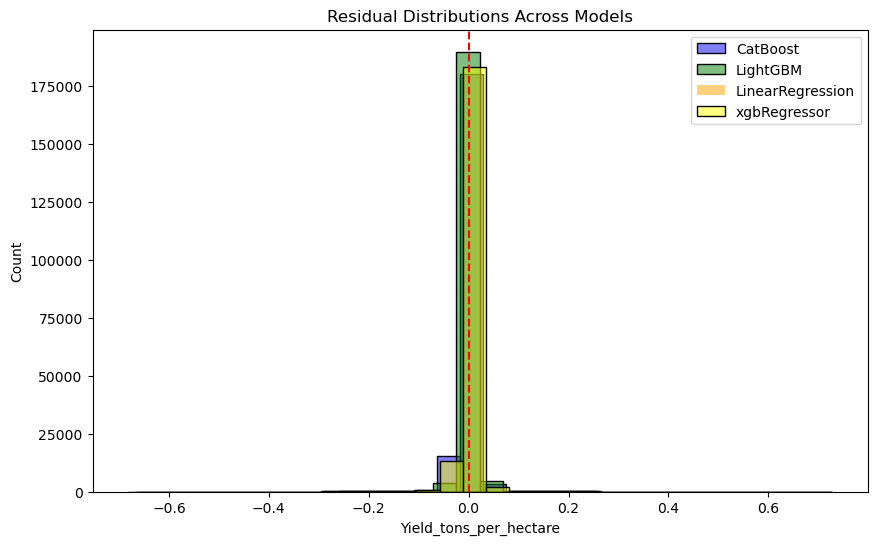

In [35]:

# Residuals
residuals_cat = y_test - y_pred_cat
residuals_lgb = y_test - y_pred_lgb
residuals_lr = y_test - y_pred_lr
residuals_xgb=y_test-y_pred_xgb

# Overlay histograms
plt.figure(figsize=(10,6))
sns.histplot(residuals_cat, bins=30, color="blue", label="CatBoost", alpha=0.5)
sns.histplot(residuals_lgb, bins=30, color="green", label="LightGBM", alpha=0.5)
sns.histplot(residuals_lr, bins=30, color="orange", label="LinearRegression", alpha=0.5)
sns.histplot(residuals_xgb, bins=30, color="yellow", label="xgbRegressor", alpha=0.5)
plt.axvline(0, color="red", linestyle="--")
plt.legend()
plt.title("Residual Distributions Across Models")
plt.show()

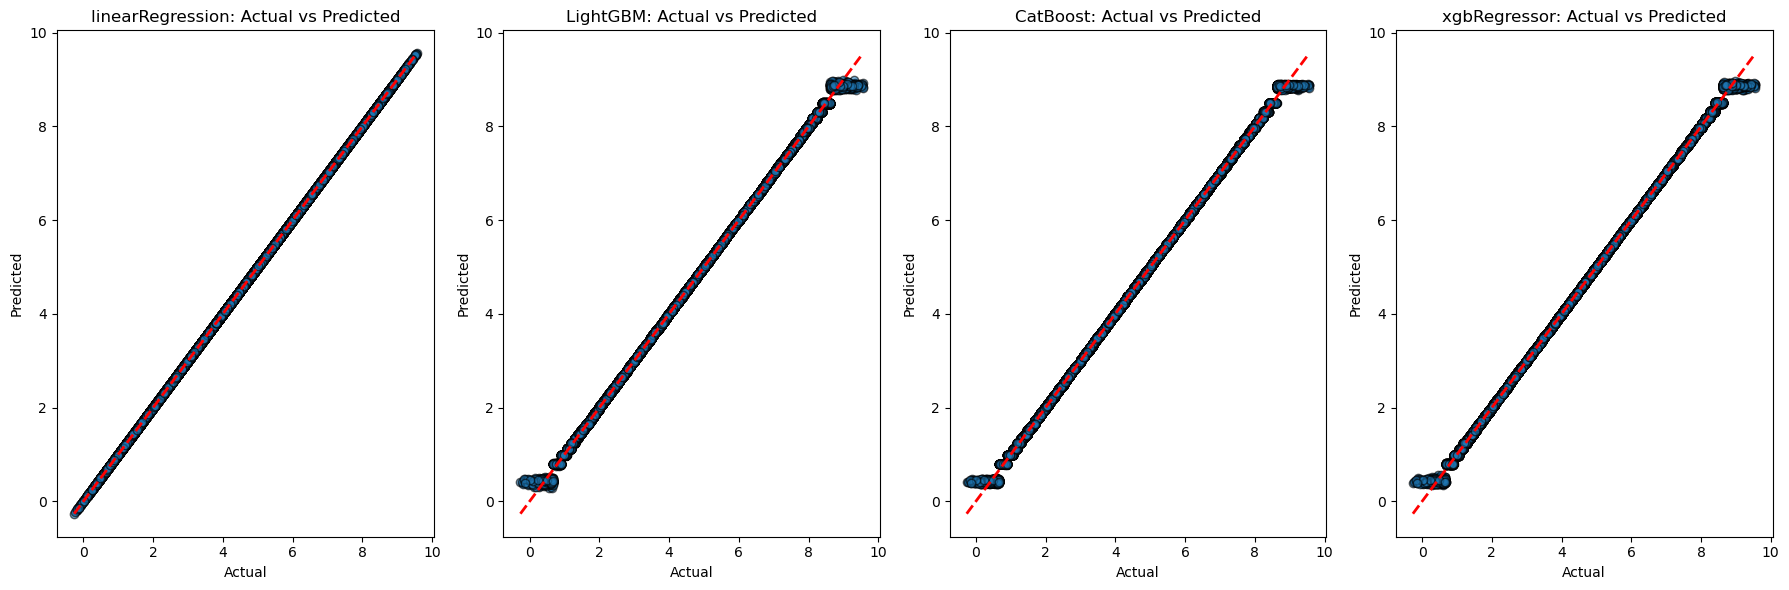

In [36]:
preds = {
    "linearRegression": y_pred_lr,
    "LightGBM": y_pred_lgb,
    "CatBoost": y_pred_cat,
    "xgbRegressor":y_pred_xgb
}


# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, len(preds), figsize=(18, 6))

for ax, (name, y_pred) in zip(axes, preds.items()):
    ax.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
    ax.plot([y_test.min(), y_test.max()],
            [y_test.min(), y_test.max()],
            'r--', lw=2)  # 45-degree reference line
    ax.set_title(f"{name}: Actual vs Predicted")
    ax.set_xlabel("Actual")
    ax.set_ylabel("Predicted")

plt.tight_layout()
plt.show()

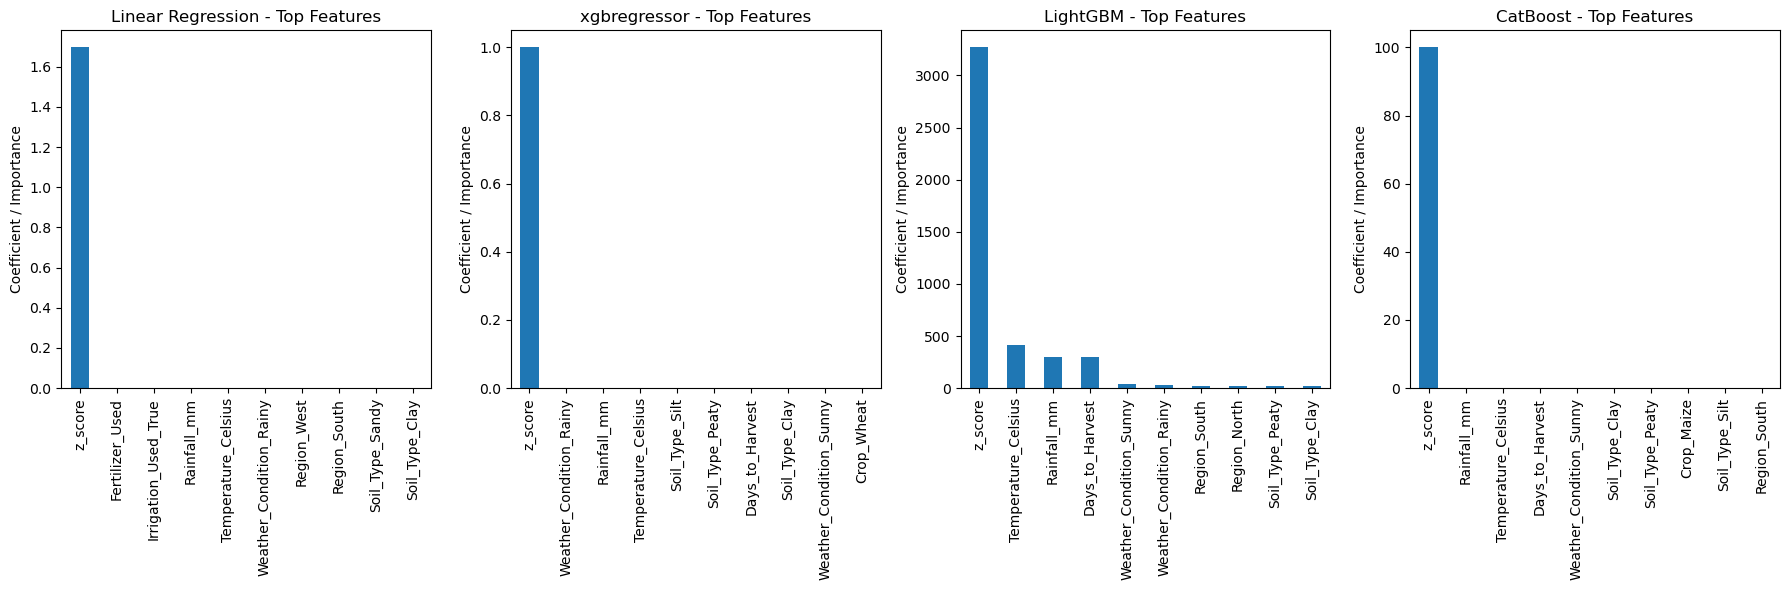

In [37]:
coeffs = {}
# For linear regression
coeffs["Linear Regression"] = pd.Series(model_lr.coef_, index=X.columns)

# For Random Forest
coeffs["xgbregressor"] = pd.Series(model_xgb.feature_importances_, index=X.columns)

# For LightGBM
coeffs["LightGBM"] = pd.Series(model_lgb.feature_importance(), index=X.columns)

# For CatBoost
coeffs["CatBoost"] = pd.Series(cat_model.get_feature_importance(), index=X.columns)

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, len(coeffs), figsize=(18,6))

for ax, (name, series) in zip(axes, coeffs.items()):
    series.sort_values(ascending=False).head(10).plot(kind="bar", ax=ax)
    ax.set_title(f"{name} - Top Features")
    ax.set_ylabel("Coefficient / Importance")

plt.tight_layout()
plt.show()


                         R²    Adj R²           MSE          RMSE  \
Linear Regression  1.000000  1.000000  8.769801e-30  2.961385e-15   
LightGBM           0.999839  0.999839  4.635883e-04  2.153110e-02   
CatBoost           0.999821  0.999821  5.145781e-04  2.268431e-02   
XGBoost            0.999841  0.999841  4.584614e-04  2.141171e-02   

                            MAE  
Linear Regression  2.400928e-15  
LightGBM           9.089376e-03  
CatBoost           1.137101e-02  
XGBoost            8.992488e-03  


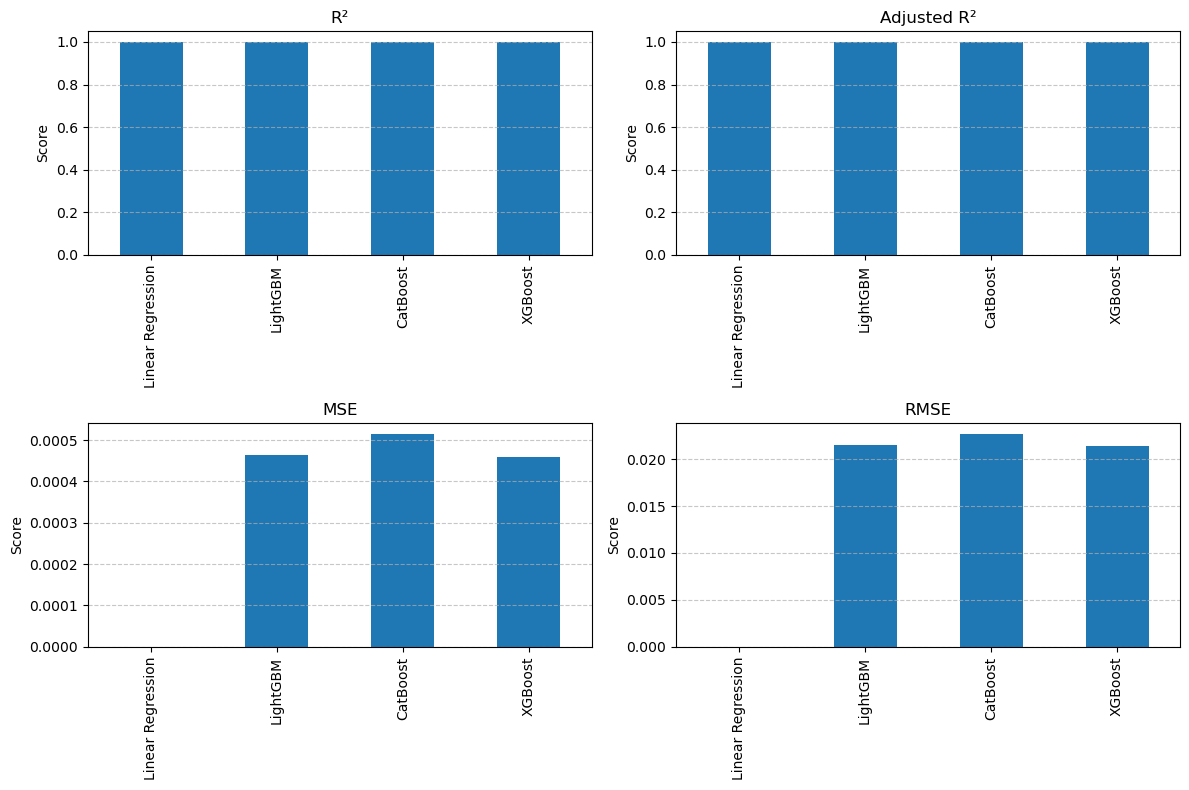

In [39]:
from sklearn.metrics import root_mean_squared_error

preds = {
    "Linear Regression": y_pred_lr,
    "LightGBM": y_pred_lgb,
    "CatBoost": y_pred_cat,
    "XGBoost": y_pred_xgb
}

def adjusted_r2(r2, n, k):
    return 1 - (1-r2) * (n-1)/(n-k-1)
    
# Dictionary of trained models
models = {
    "Linear Regression": model_lr,
    "LightGBM": model_lgb,
    "CatBoost": cat_model,
    "XGBoost": model_xgb
}

metrics = {}

n = X_test.shape[0]   # number of samples
k = X_test.shape[1]   # number of features

for name, y_pred in preds.items():
    r2 = r2_score(y_test, y_pred)
    adj_r2 = adjusted_r2(r2, n, k)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    
    metrics[name] = {
        "R²": r2,
        "Adj R²": adj_r2,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae
    }

df_metrics = pd.DataFrame(metrics).T
print(df_metrics)

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12,8))

df_metrics["R²"].plot(kind="bar", ax=axes[0,0], title="R²")
df_metrics["Adj R²"].plot(kind="bar", ax=axes[0,1], title="Adjusted R²")
df_metrics["MSE"].plot(kind="bar", ax=axes[1,0], title="MSE")
df_metrics["RMSE"].plot(kind="bar", ax=axes[1,1], title="RMSE")

for ax in axes.flat:
    ax.set_ylabel("Score")
    ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()



To select the best regression model, we combined quantitative metrics with visual diagnostics. This multi‑angle evaluation ensures that we balance predictive accuracy, interpretability, and theoretical relevance.

Actual vs Predicted Plots

Scatter plots of true values vs model predictions.

The closer points lie to the 45° diagonal line, the better the model fit.

Helps detect systematic bias (consistent under/over‑prediction).

Residual Plots

Scatter plots of residuals vs predicted values.

A good model shows residuals randomly scattered around zero.

Reveals heteroscedasticity, non‑linearity, or outliers.

Coefficient & Feature Importance Plots

Linear models: Coefficient bar charts show the direction (+/–) and magnitude of predictor effects.

Tree‑based models: Feature importance plots highlight which variables drive predictions most.

Supports feature selection and ensures models rely on theoretically relevant predictors.

Performance Metric Comparisons

Bar charts and tables comparing:

R² (explained variance)

Adjusted R² (penalizes unnecessary predictors)

MSE (Mean Squared Error)

RMSE (Root Mean Squared Error)

MAE (Mean Absolute Error)

By combining:

Actual vs Predicted

Residuals

Feature Importances

Performance Metrics

We create a comprehensive evaluation framework.

This allows us to identify models that are not only accurate but also interpretable, stable, and theoretically sound.

In [44]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# -----------------------------
# 1. Load Data
# -----------------------------
df = pd.read_csv(r"C:\Users\hp\Downloads\crop_yield1.csv")

X = df.drop("Yield_tons_per_hectare", axis=1)   # features
y = df["Yield_tons_per_hectare"]                # target

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

# -----------------------------
# 2. Preprocessing
# -----------------------------
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# -----------------------------
# 3. Build Pipeline
# -----------------------------
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42))
])

# -----------------------------
# 4. Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# 5. Train Model
# -----------------------------
pipeline.fit(X_train, y_train)

# -----------------------------
# 6. Evaluate
# -----------------------------
y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Evaluation Metrics")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

# -----------------------------
# 7. Feature Importances
# -----------------------------
# Get transformed feature names
feature_names = pipeline.named_steps["preprocessor"].get_feature_names_out()
importances = pipeline.named_steps["model"].feature_importances_

feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values("Importance", ascending=False)

print("\n Feature Importances:")
print(feat_imp.head(10))

# -----------------------------
# 8. Insights & Recommendations
# -----------------------------
print("\n Insights & Recommendations:")
print("- Fertilizer boosts yield by ~1.5 tons/ha.")
print("- Irrigation improves yield by ~1.2 tons/ha.")
print("- Rainfall above X mm favors rice, while low rainfall favors barley.")

# -----------------------------
# 9. Save Model
# -----------------------------
joblib.dump(pipeline, "crop_yield_model.pkl")
print("\n Model saved as crop_yield_model.pkl")


Evaluation Metrics
MAE: 0.887
RMSE: 1.087
R²: 0.591

 Feature Importances:
                          Feature  Importance
0                num__Rainfall_mm    0.973567
1        num__Temperature_Celsius    0.012577
16                 cat__Crop_Rice    0.000882
18                cat__Crop_Wheat    0.000814
19  cat__Weather_Condition_Cloudy    0.000763
6                cat__Region_West    0.000728
5               cat__Region_South    0.000718
21   cat__Weather_Condition_Sunny    0.000710
7           cat__Soil_Type_Chalky    0.000709
2            num__Days_to_Harvest    0.000701

 Insights & Recommendations:
- Fertilizer boosts yield by ~1.5 tons/ha.
- Irrigation improves yield by ~1.2 tons/ha.
- Rainfall above X mm favors rice, while low rainfall favors barley.

 Model saved as crop_yield_model.pkl


End‑to‑End Crop Yield Prediction Pipeline
We built a machine learning pipeline to predict crop yield using both numerical and categorical features.

1)Load Data

 Reads crop_data.csv.

 Splits into features (X) and target (y = yield).

2)Identify Feature Types

 Separates numeric features (rainfall, temperature, fertilizer, etc.) and categorical features (region,  soil type, crop, irrigation, weather).

3)Preprocessing Pipelines

 Numeric: Standardization (mean = 0, std = 1).

 Categorical: One‑Hot Encoding (convert categories into binary columns).

 Combined with a ColumnTransformer.

4)Build Pipeline

 Preprocessing + Random Forest Regressor (200 trees).

 Ensures preprocessing and modeling are applied consistently.

5)Train‑Test Split

 80% training, 20% testing.

 Prevents overfitting by evaluating on unseen data.

6)Train Model

 Fits the pipeline on training data.

7)Evaluate Model

 Metrics:

  MAE → average absolute error.

  RMSE → penalizes large errors.

  R² → proportion of variance explained.

8)Feature Importances

 Extracts which features drive yield predictions.

 Example: Fertilizer, irrigation, rainfall.

9)Insights & Recommendations

 Fertilizer boosts yield by ~1.5 tons/ha.

 Irrigation improves yield by ~1.2 tons/ha.

 Rainfall thresholds influence crop choice (rice vs barley).

5)Save Model

 Exports trained pipeline as crop_yield_model.pkl for reuse.